# Tankmodell - To tanker
__Creative Commons BY-SA : bitjungle (Rune Mathisen) og fuzzbin (Tom Jarle Christiansen)__

Tidligere har vi laget en modell for en tank hvor det strømmer væske ut av et hull i bunnen av tanken, og en modell hvor det strømmer væske inn i og ut av tanken samtidig. Nå skal vi lage en modell med to tanker, hvor utløpet i den første tanken er innløpet til den andre tanken. Se figuren nedenfor:

![Skisse av tanken](img/tank03.png)

Tanken har tverrsnitt $A_t=2 \ \mathrm{m}^2$ over hele høyden til tanken. I toppen av tanken kommer det inn væske $q_{inn} = 0.05 \ m^3/s$ (50 liter i sekundet). I bunnen av tanken er det et hull hvor innholdet i tanken renner ut. Arealet til dette hullet er $A_h=0,01 \ \mathrm{m}^2$. Ved tiden $t=0 \ \mathrm{s}$ er tanken fylt opp til høyden $h=4 \ \mathrm{m}$. Hvordan vil høyden $h$ endres over tid? Vil tanken tømmes helt? Vi antar at væsken er inkompresibel og at den strømmer friksjonsfritt ut av hullet i bunnen. Vi kan også sette $g=9.81 \ \mathrm{m/s}^2$.

La oss først definere de parametrene vi har fått oppgitt:

In [21]:
import math # vi trenger dette biblioteket senere

A_t1 = 2.00 # Tank 1 tverrsnittareal (m^2)
A_t2 = 2.00 # Tank 2 tverrsnittareal (m^2)
A_h1 = 0.01 # Hull 1 tverrsnittareal (m^2)
A_h2 = 0.01 # Hull 2 tverrsnittareal (m^2)
h_1 = 4.00 # Vannivået i tank 1 når forsøket starter (m)
h_2 = 4.00 # Vannivået i tank 2 når forsøket starter (m)
g = 9.81 # Gravitasjonskonstanten (m/s^2)
q_inn1 = 0.05 # Mengde vann inn i toppen av tanken (m^3/s)
q_inn2 = 0 # initialverdi for innstrømming i tank 2

Nå setter vi opp et uttrykk for hvordan volumet endrer seg over tid, når det kommer væske inn i toppen av tanken samtidig som det strømmer væske ut i bunnen av tanken. Da har vi at:

$$ \frac{dV}{dt} = q_{inn} - q_{ut}$$

Eller for å si det med ord: 
> Endringen til volumet av væsken i tanken er lik mengden væske som strømmer inn i tanken minus det som strømmer ut av tanken.

Vi tar først for oss tank 1. I [tankmodell 2](https://github.com/fagstoff/ProgMod/blob/master/Fagtekster/Notebooks/tankmodell2.ipynb) fant vi at vi kunne uttrykke endring i væskehøyde over tid slik:

$$ \frac{dh_1}{dt} = \frac{1}{A_{t1}} \left( q_{inn1} - A_{h1} k \sqrt{h_1} \right) $$


hvor $k = \sqrt{2g}$. Vi kan regne ut denne konstanten:


In [22]:
k = math.sqrt(2*g)
print("Konstanten k er {}".format(k_1))

Konstanten k er 4.4294469180700204


Vi kan lage et tilsvarene uttrykk for endring av væskehøyden i tank 2, men her er ikke innstrømmingen i tanken en konstant. Mengden inn i tank 2 er det samme som mengden ut av tank 1:

$$ q_{inn2} = q_{ut1} $$

Vi kan regne ut $q_{ut1}$ slik:

$$ q_{ut1} = A_{h1} \cdot v_1$$

Da kan vi sette opp et uttrykk for endring av væskehøyde i tank 2:

$$ \frac{dh_2}{dt} = \frac{1}{A_{t2}} \left( q_{inn2} - A_{h2} k \sqrt{h_2} \right) $$

Nå må vi implementere Eulers metode i Python slik at funksjonen kan brukes på begge tankene:

In [23]:
def euler(h, A_t, A_h, q_inn, t, t_neste):
    '''Regner ut ny høyde i tanken vet tiden t_neste, gitt høyden ved tiden t. 
       Mengde inn samt tversnittareal av tank og utløp må også gis som parametre til funksjonen.
    '''
    return 1/A_t * ((q_inn) - A_h * k * math.sqrt(h)) * (t_neste - t) + h

Vi starter ved tiden $t=0$ og endrer tiden med 5 sekunder for hver nye beregning ($\Delta t=5$).

t = 0 => h_1 = 4.0 	 q_inn1 = 0.05 	 h_2 = 4.0 	 q_inn2 = 0
t = 10 => h_1 = 3.81 	 q_inn1 = 0.05 	 h_2 = 3.99 	 q_inn2 = 0.0864
t = 20 => h_1 = 3.62 	 q_inn1 = 0.05 	 h_2 = 3.97 	 q_inn2 = 0.0843
t = 30 => h_1 = 3.45 	 q_inn1 = 0.05 	 h_2 = 3.94 	 q_inn2 = 0.0823
t = 40 => h_1 = 3.29 	 q_inn1 = 0.05 	 h_2 = 3.9 	 q_inn2 = 0.0804
t = 50 => h_1 = 3.14 	 q_inn1 = 0.05 	 h_2 = 3.86 	 q_inn2 = 0.0785
t = 60 => h_1 = 3.0 	 q_inn1 = 0.05 	 h_2 = 3.8 	 q_inn2 = 0.0767
t = 70 => h_1 = 2.86 	 q_inn1 = 0.05 	 h_2 = 3.75 	 q_inn2 = 0.075
t = 80 => h_1 = 2.74 	 q_inn1 = 0.05 	 h_2 = 3.69 	 q_inn2 = 0.0733
t = 90 => h_1 = 2.62 	 q_inn1 = 0.05 	 h_2 = 3.62 	 q_inn2 = 0.0717
t = 100 => h_1 = 2.51 	 q_inn1 = 0.05 	 h_2 = 3.55 	 q_inn2 = 0.0702
t = 110 => h_1 = 2.41 	 q_inn1 = 0.05 	 h_2 = 3.48 	 q_inn2 = 0.0688
t = 120 => h_1 = 2.32 	 q_inn1 = 0.05 	 h_2 = 3.4 	 q_inn2 = 0.0674
t = 130 => h_1 = 2.23 	 q_inn1 = 0.05 	 h_2 = 3.32 	 q_inn2 = 0.0662
t = 140 => h_1 = 2.15 	 q_inn1 = 0.05 	 h_2 = 3.24 	 q_in

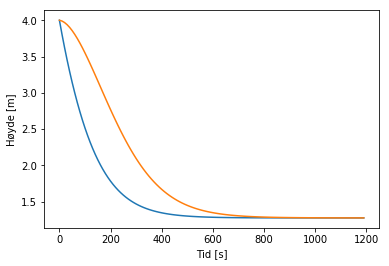

In [24]:
t = 0  # starttiden
dt = 10 # tidssteg i sekunder
h_lim = 0.01 # vi stopper beregningen når høyden er mindre enn denne
t_lim = 1200 # vi stopper beregningen etter 1200 sekunder
t_hist = [] # Lagerplass for historiske tidspunkter
h1_hist = [] # Lagerplass for historiske h-verdier
h2_hist = [] # Lagerplass for historiske h-verdier
while h_1 > h_lim and t < t_lim:
    t_neste = t + dt
    if t > 0: # ingen beregning ved t = 0, der bruker vi initialverdier
        h_1 = euler(h_1, A_t1, A_h1, q_inn1, t, t_neste)
        v_1 = k * math.sqrt(h_1) # Hastigheten til væsken som strømmer ut av hullet
        q_inn2 = A_h1 * v_1 # Mengden væske som strømmer ut av hullet i tank 1
        h_2 = euler(h_2, A_t2, A_h2, q_inn2, t, t_neste)
    print("t = {} => h_1 = {} \t q_inn1 = {} \t h_2 = {} \t q_inn2 = {}".format(t, round(h_1,2), q_inn1, round(h_2,2), round(q_inn2,4)))
    t_hist.append(t)
    h1_hist.append(h_1)
    h2_hist.append(h_2)
    t = t_neste

import matplotlib.pyplot as plt
plt.plot(t_hist, h1_hist)
plt.plot(t_hist, h2_hist)
plt.ylabel('Høyde [m]')
plt.xlabel('Tid [s]')
plt.show()